# Global Renewable Energy Usage (2020-2024)

This dataset contains information on renewable energy adoption and usage by households around the world, spanning the years 2020 to 2024. It provides insights into the growing trend of renewable energy sources like solar, wind, hydro, and geothermal being utilized in residential settings. The data includes factors such as household size, income levels, urban vs rural locations, and government subsidies, which may influence renewable energy adoption and consumption.

Features:
- Household_ID: A unique identifier for each household.

- Region: The geographical region where the household is located (e.g., North America, Europe, Asia).

- Country: The specific country of the household.

- Energy_Source: The type of renewable energy being used by the household (e.g., Solar, Wind, Hydro).

- Monthly_Usage_kWh: The monthly energy consumption in kilowatt-hours.

- Year: The year the data was recorded (2020-2024).

- Household_Size: The number of people living in the household.

- Income_Level: The income bracket of the household (Low, Middle, High).

- Urban_Rural: Whether the household is in an urban or rural area.

- Adoption_Year: The year the household first adopted renewable energy.

- Subsidy_Received: Whether the household received any government subsidies for renewable energy (Yes/No).

- Cost_Savings_USD: The monthly savings in USD due to using renewable energy.

# Questions:

1. What is the distribution of the renewable energy?

2. How does this distribution differ across continents or countries?
   Are certain energy sources more dominant in specific regions?

3. Do factors such as household size, location, or subsidy status influence renewable energy adoption?

4. Higher Monthly usage of renewable energy, higher cost savings?

5. Does receiving a subsidy impact monthly energy usage?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Renewable_Energy_Usage_Sampled.csv")

## Basic Exploratory Data Analysis

It is to understand the structure of the data, detect anomalies, and prepare for more complex analysis or modelling.

In [3]:
df.head()

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


In [4]:
df.tail()

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
995,H04712,Asia,Japan,Wind,1056.65,2021,6,Middle,Urban,2018,No,307.67
996,H02314,North America,USA,Wind,1182.33,2020,2,High,Rural,2019,No,125.96
997,H03215,Europe,Germany,Wind,417.88,2023,6,Middle,Rural,2010,Yes,273.25
998,H02733,Australia,Australia,Biomass,258.91,2020,7,Middle,Urban,2017,Yes,224.35
999,H01927,Australia,New Zealand,Biomass,455.84,2020,7,Low,Urban,2013,No,252.97


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB


In [6]:
df.describe()

,Monthly_Usage_kWh,Year,Household_Size,Adoption_Year,Cost_Savings_USD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,767.325530,2021.992000,4.480000,2015.992000,248.389850
std,419.649102,1.419137,2.297581,3.973629,143.127301
min,50.740000,2020.000000,1.000000,2010.000000,10.420000
25%,402.730000,2021.000000,2.000000,2013.000000,122.122500
50%,760.190000,2022.000000,5.000000,2016.000000,242.530000
75%,1117.747500,2023.000000,6.000000,2019.000000,372.520000
max,1497.340000,2024.000000,8.000000,2024.000000,499.830000


In [7]:
df.isnull().sum()

Household_ID         0
Region               0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64

In [8]:
categorical_col = df.select_dtypes(include=['object']).columns
categorical_col

Index(['Household_ID', 'Region', 'Country', 'Energy_Source', 'Income_Level',
       'Urban_Rural', 'Subsidy_Received'],
      dtype='object')

In [9]:
for col in categorical_col:
    print(df[col].value_counts())
    print("-"*10)

Household_ID
H01502    1
H00196    1
H01136    1
H01205    1
H01048    1
         ..
H03826    1
H01198    1
H04254    1
H04059    1
H01927    1
Name: count, Length: 1000, dtype: int64
----------
Region
Europe           173
Australia        167
Africa           167
South America    166
North America    164
Asia             163
Name: count, dtype: int64
----------
Country
Australia       84
New Zealand     83
Canada          60
USA             56
Mexico          48
Spain           44
Japan           42
Ghana           42
Peru            38
South Africa    37
Italy           36
France          36
Egypt           36
Brazil          35
Colombia        34
Indonesia       33
Argentina       33
UK              32
South Korea     32
India           29
China           27
Kenya           27
Chile           26
Nigeria         25
Germany         25
Name: count, dtype: int64
----------
Energy_Source
Wind          227
Solar         201
Hydro         199
Biomass       193
Geothermal    180
Name: coun

## **1. Explore the Renewable Energy Source distribution across the six continents**

- First, Look at the overall distribution of the renewable energy sources
- Second, plot the distribution for each continent

In [10]:
energy_counts= df.Energy_Source.value_counts()
energy_counts

Energy_Source
Wind          227
Solar         201
Hydro         199
Biomass       193
Geothermal    180
Name: count, dtype: int64

In [11]:
# Define consistent color mapping for each energy source
colors = {
    'Wind': '#87CEEB',
    'Solar': '#FF4500',
    'Hydro': '#4682B4',
    'Geothermal': '#FF8C00',
    'Biomass': '#228B22'}

#### **1.1 The overall distribution of Renewable Energy Sources**

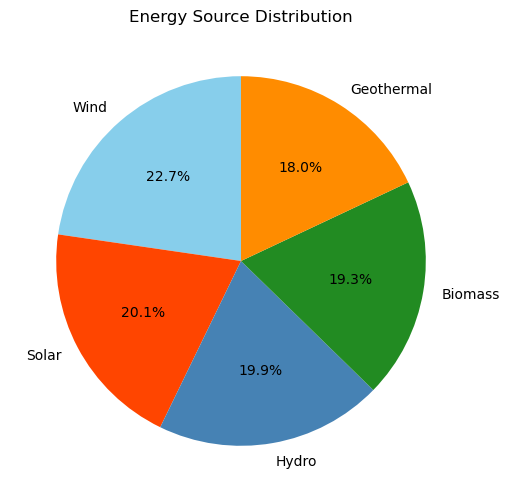

In [12]:
energy_colors= [colors[energy] for energy in energy_counts.index]

plt.figure(figsize=(8,6))

energy_counts.plot.pie(autopct='%1.1f%%', 
                       startangle=90, 
                       labels=energy_counts.index,
                       colors = energy_colors)
plt.title('Energy Source Distribution')
plt.ylabel('')  # Removes the default ylabel 'count'
plt.show()

Insights:

Based on this dataset:

1. Wind energy dominates slightly but is closely followed by Solar, Hydro, and Biomass.

2. Geothermal energy has the smallest share, possibly due to geographical or infrastructure constraints.

Then, we now explore the specific distribution for each continent.



#### **1.2 Regional Distribution of Renewable Energy Sources**

In [13]:
regions = df.Region.unique()
regions

array(['North America', 'Australia', 'South America', 'Africa', 'Europe',
       'Asia'], dtype=object)

In [14]:
# group by Regions and count Energy_Source distribution
region_energy_counts = df.groupby('Region')['Energy_Source'].value_counts().unstack(fill_value=0)   # reshape data from a multi-index format to a tabular format, any missing values = 0
region_energy_counts

Energy_Source,Biomass,Geothermal,Hydro,Solar,Wind
Region,,,,,
Africa,30,30,35,31,41
Asia,27,31,29,35,41
Australia,33,30,34,36,34
Europe,35,33,42,22,41
North America,32,28,32,43,29
South America,36,28,27,34,41


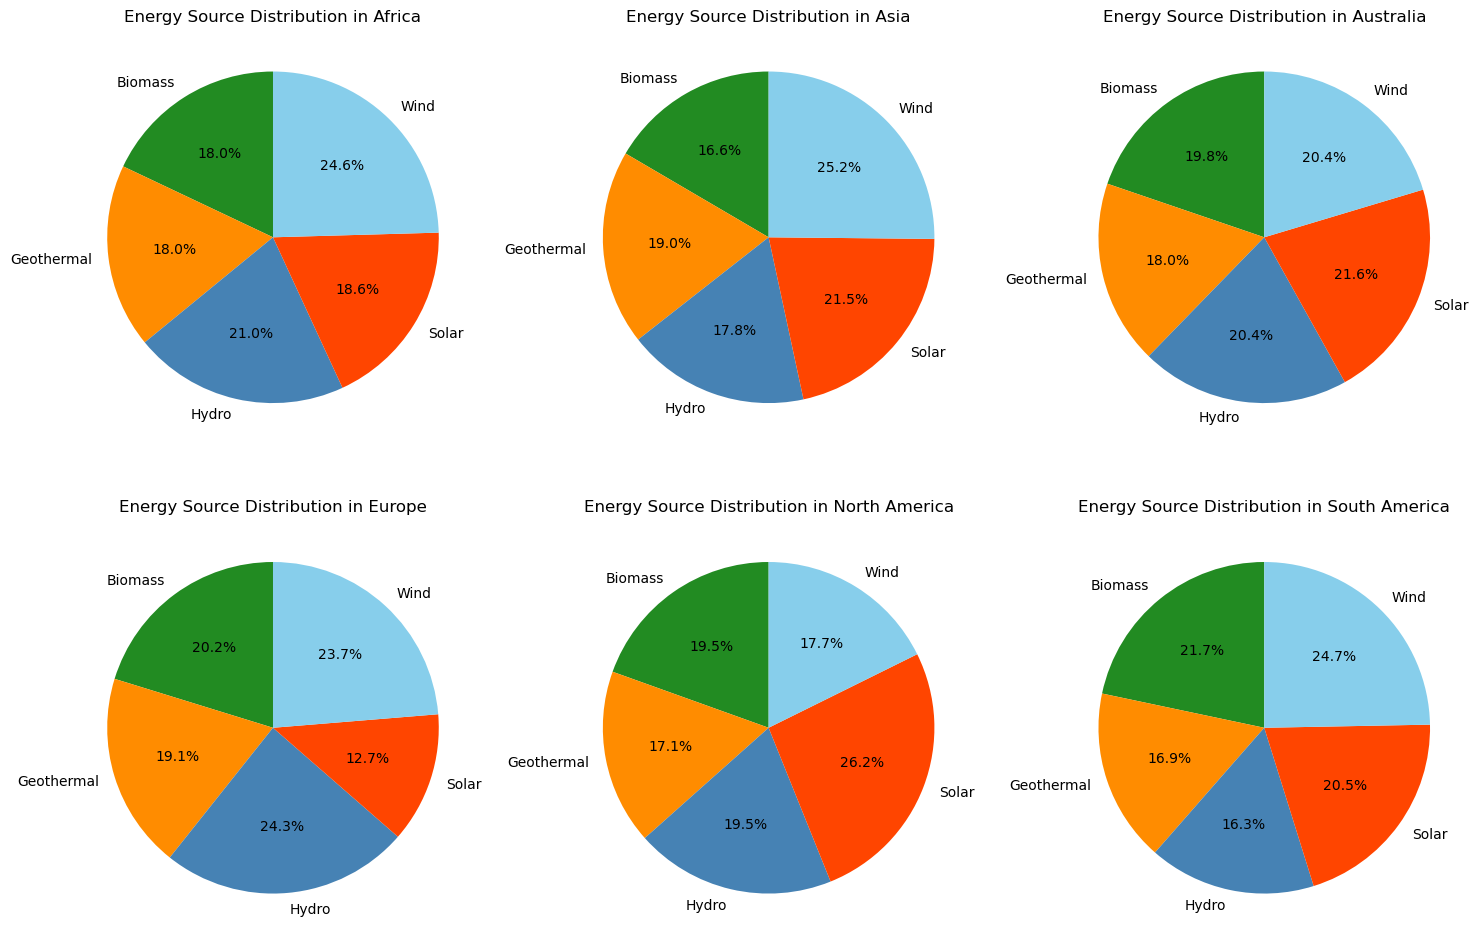

In [15]:
# plot settings
fig, axes = plt.subplots(2,3, figsize=(15,10))

axes = axes.flatten() # axes is a 2D array when creating a 2x3 grid, so must flatten it for easy linear indexing

for i, reg in enumerate(region_energy_counts.index):
    counts = region_energy_counts.loc[reg]
    
    axes[i].pie(counts,
                labels=counts.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=[colors[energy] for energy in region_energy_counts.columns])
    axes[i].set_title(f"Energy Source Distribution in {reg}")
    
plt.tight_layout()
plt.show()

Insights:

Based on this dataset:

1. There are some slight differences in the distribution across continents;
2. Wind is the leading energy source in Africa, Asia, and South America; 
3. Solar dominates in North America;
4. Hydro has the largest share in Europe;


## **2. Adoption Trends Over Time**

- Adoption Trends of Various Renewable Energy over time;
- Cumulative adoption trends over time

In [16]:
df.Adoption_Year.describe()

count    1000.000000
mean     2015.992000
std         3.973629
min      2010.000000
25%      2013.000000
50%      2016.000000
75%      2019.000000
max      2024.000000
Name: Adoption_Year, dtype: float64

In [17]:
df.Adoption_Year.value_counts()

Adoption_Year
2010    90
2013    83
2017    80
2011    79
2015    79
2014    79
2020    77
2012    74
2021    71
2019    71
2016    63
2018    58
2022    48
2023    35
2024    13
Name: count, dtype: int64

In [18]:
df[["Energy_Source", "Adoption_Year"]]

,Energy_Source,Adoption_Year
0,Hydro,2012
1,Geothermal,2023
2,Biomass,2017
3,Biomass,2023
4,Hydro,2010
...,...,...
995,Wind,2018
996,Wind,2019
997,Wind,2010
998,Biomass,2017


#### **2.1  Adoption trends of various energy sources over years (2020 -2024)**

In [19]:
year_energy_counts = df.groupby('Adoption_Year').Energy_Source.value_counts().unstack(fill_value=0)

year_energy_counts

Energy_Source,Biomass,Geothermal,Hydro,Solar,Wind
Adoption_Year,,,,,
2010,14,19,20,16,21
2011,17,10,19,19,14
2012,17,15,20,12,10
2013,16,9,23,16,19
2014,10,20,12,15,22
2015,16,13,11,17,22
2016,12,12,9,13,17
2017,19,11,17,21,12
2018,13,8,8,11,18


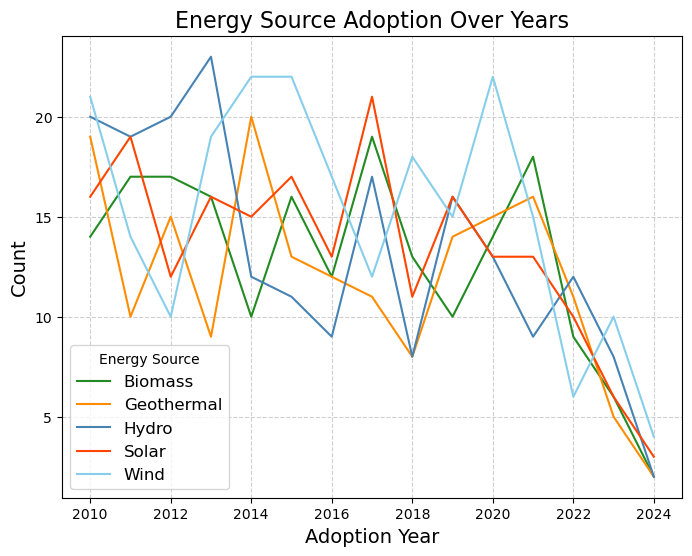

In [20]:
plt.figure(figsize=(8, 6))

for energy in year_energy_counts.columns:
    plt.plot(
        year_energy_counts.index,
        year_energy_counts[energy],
        label=energy,
        color=colors[energy]
    )

plt.title('Energy Source Adoption Over Years', fontsize=16)
plt.xlabel('Adoption Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title="Energy Source", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Insights:

Based on the data:

1. Adoption rates for all energy sources appear to decline after 2020;
2. Adoption varies significantly year by year, with some energy sources (e.g., Solar and Wind) experiencing noticeable peaks followed by drops.

#### **2.2 Cumulative Adoption trends**

In [21]:
# cumulative counts along years
cumulative_year_energy_counts = year_energy_counts.cumsum()

cumulative_year_energy_counts

Energy_Source,Biomass,Geothermal,Hydro,Solar,Wind
Adoption_Year,,,,,
2010,14,19,20,16,21
2011,31,29,39,35,35
2012,48,44,59,47,45
2013,64,53,82,63,64
2014,74,73,94,78,86
2015,90,86,105,95,108
2016,102,98,114,108,125
2017,121,109,131,129,137
2018,134,117,139,140,155


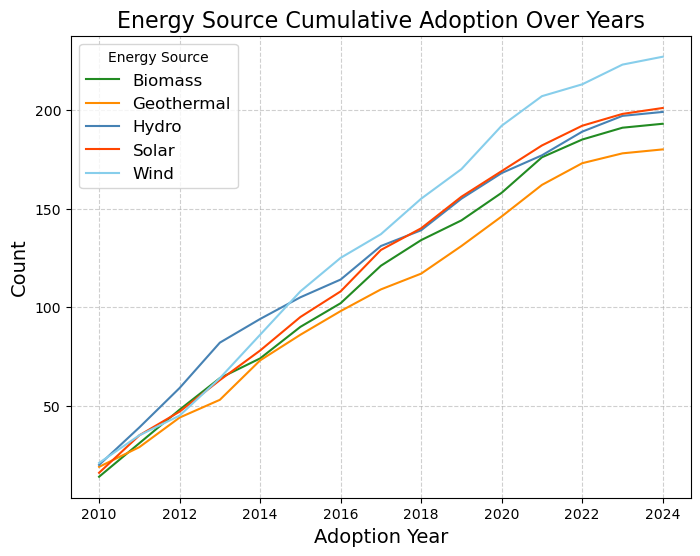

In [22]:
plt.figure(figsize=(8, 6))

for energy in cumulative_year_energy_counts.columns:
    plt.plot(
        cumulative_year_energy_counts.index,
        cumulative_year_energy_counts[energy],
        label=energy,
        color=colors[energy]
    )

plt.title('Energy Source Cumulative Adoption Over Years', fontsize=16)
plt.xlabel('Adoption Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title="Energy Source", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

#### **2.3 Cumulative Adoption Trends across six continents**

In [23]:
# Group data by Region and Adoption Year
region_year_energy_counts = df.groupby(['Region', 'Adoption_Year']).Energy_Source.value_counts().unstack(fill_value=0)

region_year_energy_counts

Energy_Source                Biomass  Geothermal  Hydro  Solar  Wind
Region        Adoption_Year                                         
Africa        2010                 2           3      3      3     8
              2011                 3           3      3      4     1
              2012                 6           2      4      2     1
              2013                 0           2      4      1     2
              2014                 1           5      2      3     7
...                              ...         ...    ...    ...   ...
South America 2020                 3           1      2      2     2
              2021                 3           4      2      2     3
              2022                 1           1      2      1     1
              2023                 1           2      1      1     1
              2024                 0           0      0      0     1

[90 rows x 5 columns]

In [24]:
# Compute cumulative counts for each region
# multiindex, make sure the cumulative values are calculated for each region
cumulative_region_year_energy_counts = region_year_energy_counts.groupby(level=0).cumsum()

cumulative_region_year_energy_counts

Energy_Source                Biomass  Geothermal  Hydro  Solar  Wind
Region        Adoption_Year                                         
Africa        2010                 2           3      3      3     8
              2011                 5           6      6      7     9
              2012                11           8     10      9    10
              2013                11          10     14     10    12
              2014                12          15     16     13    19
...                              ...         ...    ...    ...   ...
South America 2020                31          21     22     30    35
              2021                34          25     24     32    38
              2022                35          26     26     33    39
              2023                36          28     27     34    40
              2024                36          28     27     34    41

[90 rows x 5 columns]

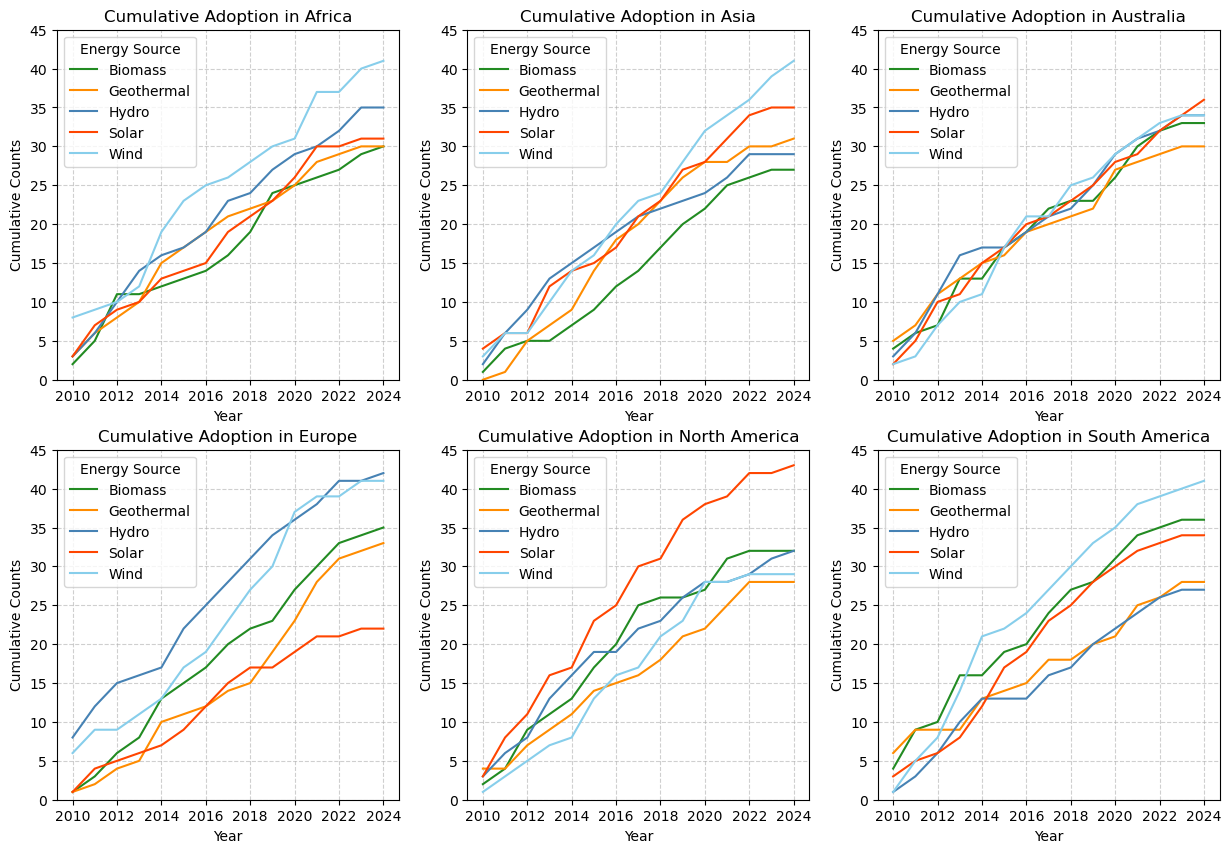

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

# loop through each region and plots the cumulative trend
for i, reg in enumerate(cumulative_region_year_energy_counts.index.levels[0]): # for multi-index
    region_data = cumulative_region_year_energy_counts.loc[reg]     # for each region
    
    for energy in region_data.columns:
        axes[i].plot(region_data.index,
                     region_data[energy],
                     label=energy,
                     color=colors[energy])
    
    axes[i].set_title(f"Cumulative Adoption in {reg}")
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Cumulative Counts')
    axes[i].set_ylim(0, 45)
    axes[i].legend(title="Energy Source", fontsize= 10)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    
plt.show()

Insights:

Based on the data:

1. Wind dominates in Africa, Asia, and South America， while Solar leads in North America.

2. Australia shows the most balanced growth across all energy sources.

3. Europe demonstrates a clear distinction in the adoption of various energy sources.
   


## **3. Relationship Between Energy Adoption and Household size**

C:\Users\bingh\AppData\Local\Temp\ipykernel_23244\204943423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


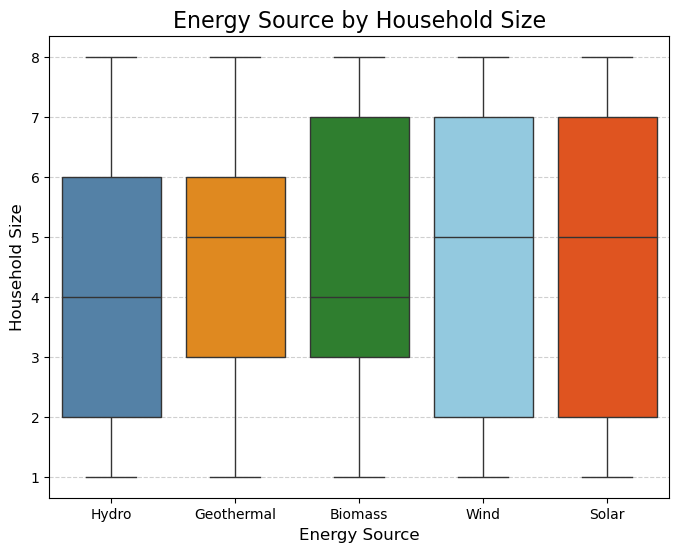

In [26]:
# Box plot for Energy source by household size
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df, 
    x='Energy_Source', 
    y='Household_Size',
    palette=colors)
 
plt.title('Energy Source by Household Size', fontsize=16)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Household Size', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Insights:

From the Boxplot, it is hard to tell the relationship between the choice of energy source and Household_size

Then we can do a Chi-square test to see the statistical relationship.

#### **Chi-square Test between Energy Source and Household_size**


In [27]:
# Contingency table
contingency_table = pd.crosstab(df['Household_Size'], df['Energy_Source'])

print(contingency_table)

Energy_Source   Biomass  Geothermal  Hydro  Solar  Wind
Household_Size                                         
1                    23          23     24     25    28
2                    23          19     28     27    37
3                    23          20     27     34    28
4                    29          27     25     13    16
5                    21          22     21     23    36
6                    22          29     28     27    24
7                    22          20     24     30    30
8                    30          20     22     22    28


In [28]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 29.08775329467707
P-Value: 0.4080869936314851
Degrees of Freedom: 28
Expected Frequencies:
 [[23.739 22.14  24.477 24.723 27.921]
 [25.862 24.12  26.666 26.934 30.418]
 [25.476 23.76  26.268 26.532 29.964]
 [21.23  19.8   21.89  22.11  24.97 ]
 [23.739 22.14  24.477 24.723 27.921]
 [25.09  23.4   25.87  26.13  29.51 ]
 [24.318 22.68  25.074 25.326 28.602]
 [23.546 21.96  24.278 24.522 27.694]]


Interpretation:

P_Value: 0.41

The p-value > 0.05, so it fails to reject the null hypothesis. This means there is no statistically significant association between Household_Size and Energy_Source. Or we can say, the choice of energy source does not appear to be influenced by household size in a statistically significant way.



## **4. Relationship Between Energy Adoption and Location (Urban vs. Rural)**

In [29]:
df.groupby('Urban_Rural').Energy_Source.value_counts().unstack()

Energy_Source,Biomass,Geothermal,Hydro,Solar,Wind
Urban_Rural,,,,,
Rural,96,96,99,104,119
Urban,97,84,100,97,108


In [30]:
contingency_table = pd.crosstab(df['Urban_Rural'], df['Energy_Source'])

print(contingency_table)

Energy_Source  Biomass  Geothermal  Hydro  Solar  Wind
Urban_Rural                                           
Rural               96          96     99    104   119
Urban               97          84    100     97   108


In [31]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.803657282192095
P-Value: 0.937957083178007
Degrees of Freedom: 4
Expected Frequencies:
 [[ 99.202  92.52  102.286 103.314 116.678]
 [ 93.798  87.48   96.714  97.686 110.322]]


No statistical relationship between energy source and locations

## **5. Relationship Between Energy Adoption and Subsidy**

In [32]:
df.groupby('Subsidy_Received').Energy_Source.value_counts().unstack()

Energy_Source,Biomass,Geothermal,Hydro,Solar,Wind
Subsidy_Received,,,,,
No,102,88,92,101,120
Yes,91,92,107,100,107


In [33]:
contingency_table = pd.crosstab(df['Subsidy_Received'], df['Energy_Source'])

print(contingency_table)

Energy_Source     Biomass  Geothermal  Hydro  Solar  Wind
Subsidy_Received                                         
No                    102          88     92    101   120
Yes                    91          92    107    100   107


In [34]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 2.5600458385006757
P-Value: 0.6339168883734201
Degrees of Freedom: 4
Expected Frequencies:
 [[ 97.079  90.54  100.097 101.103 114.181]
 [ 95.921  89.46   98.903  99.897 112.819]]


Again, No statistical relationship between energy source and Subsides

## **6. Higher Usage, higher Savings?**

Explore the relationship between Monthly_usage and Cost saving

In [35]:
energy_sources = df.Energy_Source.unique()

energy_sources

array(['Hydro', 'Geothermal', 'Biomass', 'Wind', 'Solar'], dtype=object)

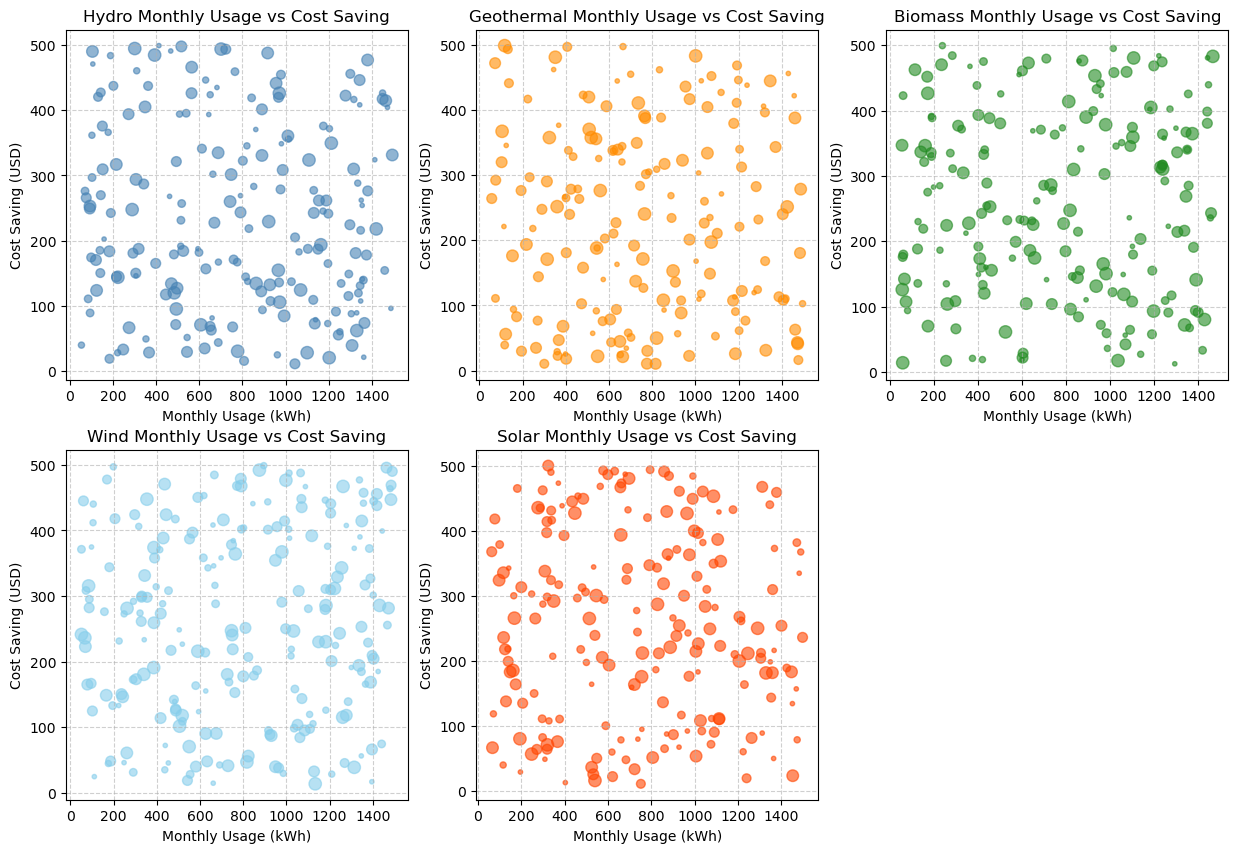

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes = axes.flatten()

# loop through each energy source and scatterplot the relationship between Monthly_Usage_kWh vs. Cost_Savings_USD vs. Household_Size
for i, energy in enumerate(energy_sources):
    energy_data = df[df.Energy_Source == energy]  # filter data for the current energy source

    axes[i].scatter(
        energy_data['Monthly_Usage_kWh'],
        energy_data['Cost_Savings_USD'],
        s=energy_data['Household_Size'] *10, # bubbles size
        color=colors[energy],
        alpha = 0.6 
    )
    
    axes[i].set_title(f"{energy} Monthly Usage vs Cost Saving", fontsize=12)
    axes[i].set_xlabel("Monthly Usage (kWh)", fontsize=10)
    axes[i].set_ylabel("Cost Saving (USD)", fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    
# Remove the unused subplot (last one)
fig.delaxes(axes[-1])  

plt.show()

Insights:

1. No **strong or consistent** positive association between Monthly usage and Cost saving;

2. Larger households save more? did not see from the data

3. Larger households use more? could not see it either.

So, The relationships between Monthly Usage, Cost Saving, and Household Size appear weak or non-existent based on this data

## **7. Does Receiving subsidy influence the monthly usage?**

In [37]:
df[['Energy_Source', 'Monthly_Usage_kWh', 'Subsidy_Received']]

,Energy_Source,Monthly_Usage_kWh,Subsidy_Received
0,Hydro,1043.49,No
1,Geothermal,610.01,No
2,Biomass,1196.75,Yes
3,Biomass,629.67,No
4,Hydro,274.46,No
...,...,...,...
995,Wind,1056.65,No
996,Wind,1182.33,No
997,Wind,417.88,Yes
998,Biomass,258.91,Yes


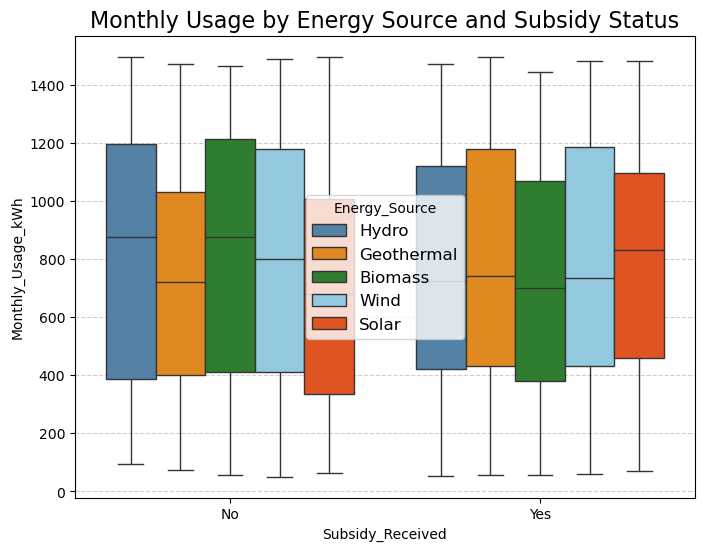

In [38]:
# Boxplot of monthly usage by subsidy_received 
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x='Subsidy_Received',
    y='Monthly_Usage_kWh',
    hue='Energy_Source',
    palette=colors
)

plt.title('Monthly Usage by Energy Source and Subsidy Status', fontsize=16)
plt.xlabel('Subsidy_Received', fontsize=10)
plt.ylabel('Monthly_Usage_kWh', fontsize=10)
plt.legend(title='Energy_Source', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Insights:

Monthly usage distributions are similar between households with and without subsidies for all energy sources